In [59]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [61]:

titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Keraksiz bolgan column lani tashab yubordik

In [62]:
df = titanic.drop(columns=["embarked","class",'deck',"alive"])
df

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,True,Cherbourg,True


Shapedagi ozgarishlarni koramiz

In [63]:
print(df.shape)
print(df.dropna(how="any").shape)

(891, 11)
(712, 11)


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   who          891 non-null    object 
 8   adult_male   891 non-null    bool   
 9   embark_town  889 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 64.5+ KB


In [66]:
df['age'].value_counts()


age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [68]:
df['age'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


## Standardisation

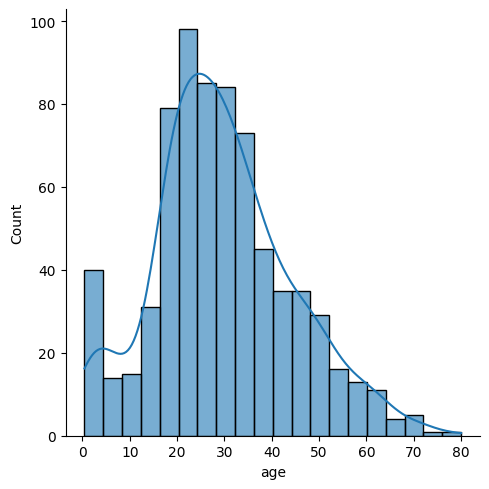

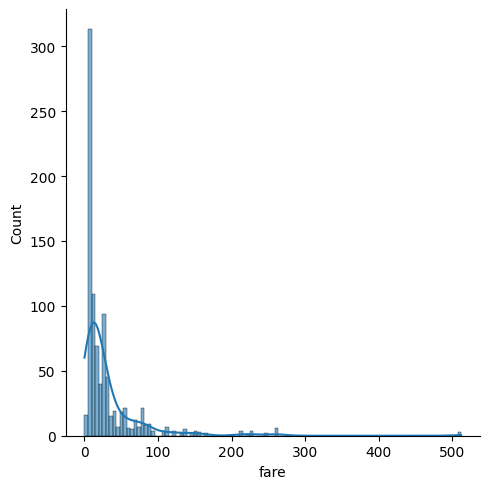

In [69]:
sns.displot(df, x="age", kde=True, alpha=0.6)
sns.displot(df, x="fare", kde=True, alpha=0.6)

plt.show()

In [70]:
df["new_age"] = (df["age"]-df["age"].mean())/df["age"].std()
df["new_fare"] = (df["fare"]-df["fare"].mean())/df["fare"].std()

df

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,new_age,new_fare
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False,-0.530005,-0.502163
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False,0.571430,0.786404
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True,-0.254646,-0.488580
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False,0.364911,0.420494
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True,0.364911,-0.486064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,True,Southampton,True,-0.185807,-0.386454
887,1,1,female,19.0,0,0,30.0000,woman,False,Southampton,True,-0.736524,-0.044356
888,0,3,female,NaN,1,2,23.4500,woman,False,Southampton,False,NaN,-0.176164
889,1,1,male,26.0,0,0,30.0000,man,True,Cherbourg,True,-0.254646,-0.044356


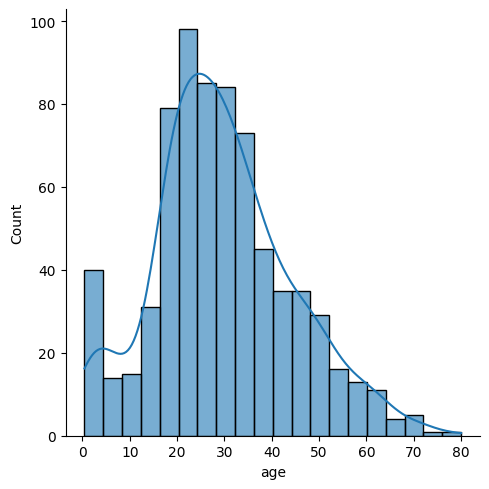

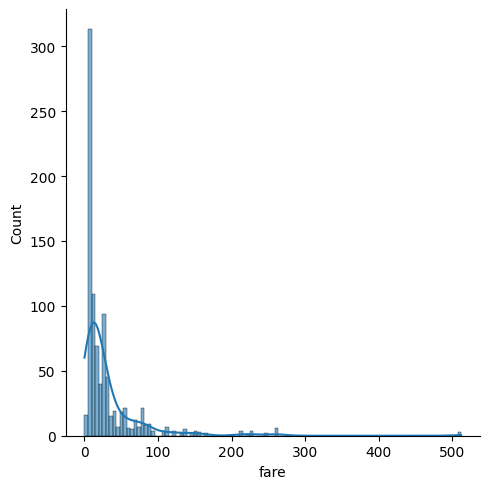

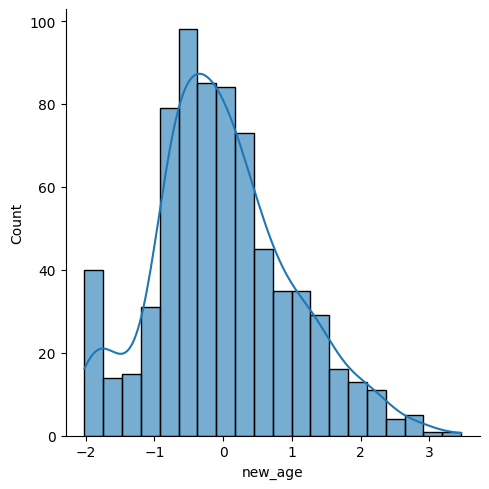

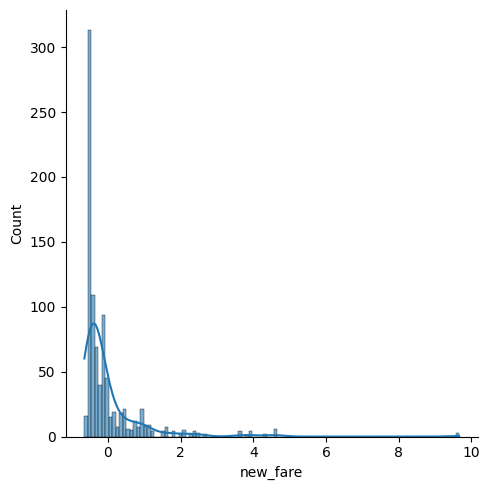

In [71]:
sns.displot(df, x="age", kde=True, alpha=0.6)
sns.displot(df, x="fare", kde=True, alpha=0.6)
sns.displot(df, x="new_age", kde=True, alpha=0.6)
sns.displot(df, x="new_fare", kde=True, alpha=0.6)


plt.show()

## MinMax scaling

In [73]:
df["MinMax_age"] = (df["age"] - df["age"].min())/(df["age"].max()-df["age"].min())
df["MinMax_fare"] = (df["fare"] - df["fare"].min())/(df["fare"].max()-df["fare"].min())
df

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,new_age,new_fare,MinMax_age,MinMax_fare
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False,-0.530005,-0.502163,0.271174,0.014151
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False,0.571430,0.786404,0.472229,0.139136
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True,-0.254646,-0.488580,0.321438,0.015469
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False,0.364911,0.420494,0.434531,0.103644
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True,0.364911,-0.486064,0.434531,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,True,Southampton,True,-0.185807,-0.386454,0.334004,0.025374
887,1,1,female,19.0,0,0,30.0000,woman,False,Southampton,True,-0.736524,-0.044356,0.233476,0.058556
888,0,3,female,NaN,1,2,23.4500,woman,False,Southampton,False,NaN,-0.176164,NaN,0.045771
889,1,1,male,26.0,0,0,30.0000,man,True,Cherbourg,True,-0.254646,-0.044356,0.321438,0.058556


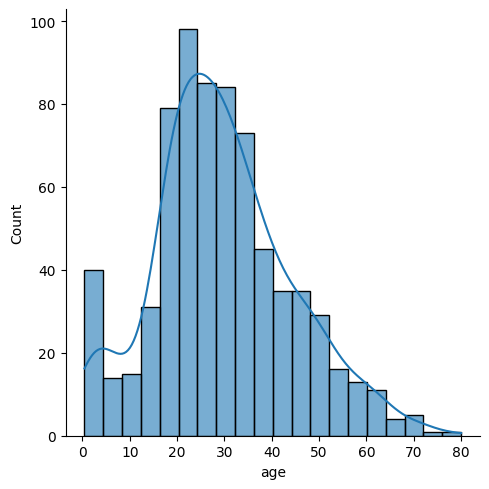

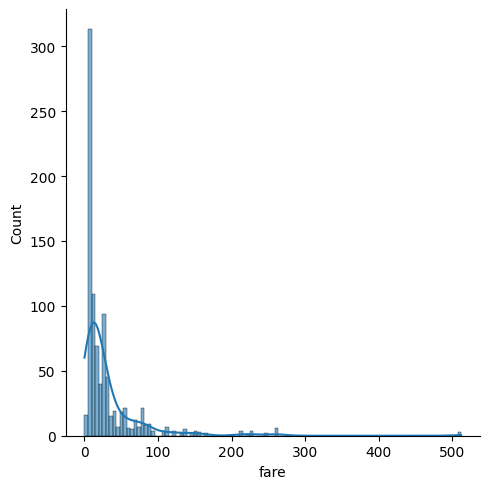

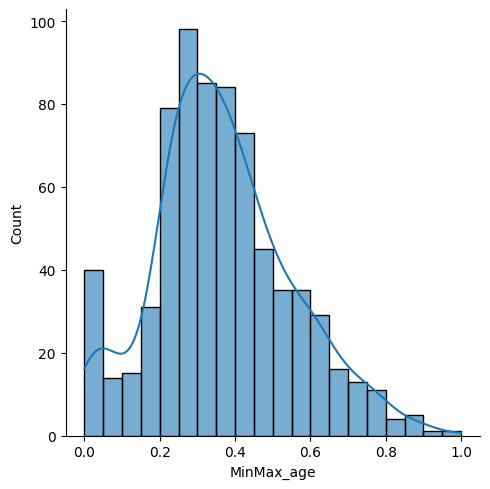

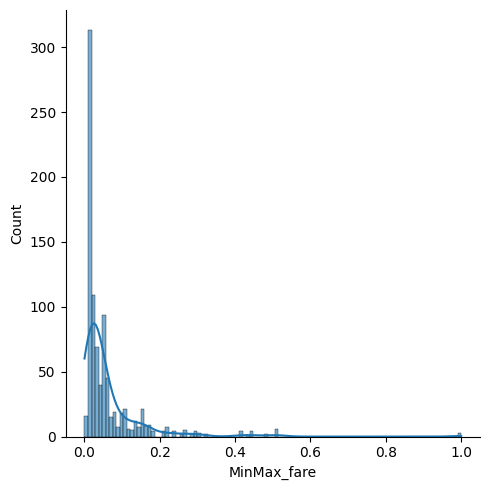

In [74]:
sns.displot(df, x="age", kde=True, alpha=0.6)
sns.displot(df, x="fare", kde=True, alpha=0.6)
sns.displot(df, x="MinMax_age", kde=True, alpha=0.6)
sns.displot(df, x="MinMax_fare", kde=True, alpha=0.6)


plt.show()

## Mean Normalisation


In [ ]:
df["MinMax_age"] = (df["age"] - df["age"].min())/(df["age"].max()-df["age"].min())
df["MinMax_fare"] = (df["fare"] - df["fare"].min())/(df["fare"].max()-df["fare"].min())
df